In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from time import time
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = 10,8 
from sklearn.cluster import KMeans 
from skimage import io

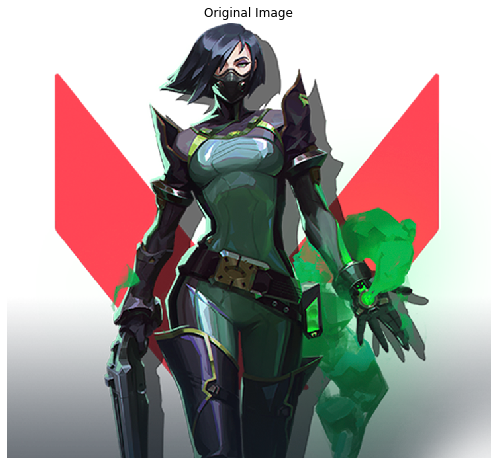

In [5]:
url = 'https://playvalorant.com/assets/images/specs/viper-specs.png'
img_original = io.imread(url)
plt.axis('off')
plt.imshow(img_original)
plt.title('Original Image')
plt.show()

In [4]:
img = np.array(img_original,dtype=float) / 255
w, h, d = original_shape = img.shape
print('Original Shape'.center(20,'='))
print(img.shape)
image_array = img.reshape(-1,d)
print('ReShaped'.center(20,'='))
print(image_array.shape)

===Original Shape===
(658, 731, 4)
======ReShaped======
(480998, 4)


In [5]:
n_colours = [64,32]
t0 = time()
kmeans64 = KMeans(n_clusters = n_colours[0],random_state=42,verbose=2,n_jobs=-1).fit(image_array)
print('Completed 64 clusters in'+ str({round(time()-t0,2)})+'seconds.')
t0 = time()
kmeans32 = KMeans(n_clusters = n_colours[1],random_state=42,verbose=2,n_jobs=-1)
kmeans32.fit(image_array)
print('Completed 32 clusters in' + str({round(time()-t0,2)})+  ' seconds.')

labels64 = kmeans64.labels_
labels32 = kmeans32.labels_


Completed 64 clusters in{430.97}seconds.
Completed 32 clusters in{46.38} seconds.


In [6]:
def recreate_image(centroids, labels, w, h):
    d = centroids.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = centroids[labels[label_idx]]
            label_idx += 1
    return image

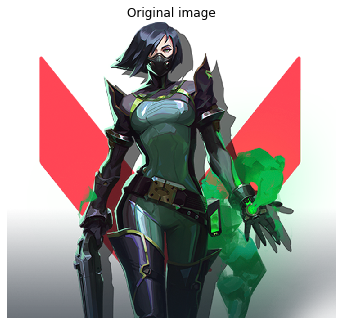

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(132)
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

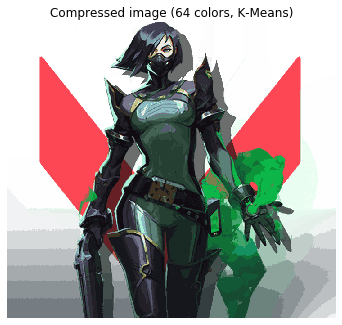

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.axis('off')
plt.title('Compressed image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans64.cluster_centers_, labels64, w, h))

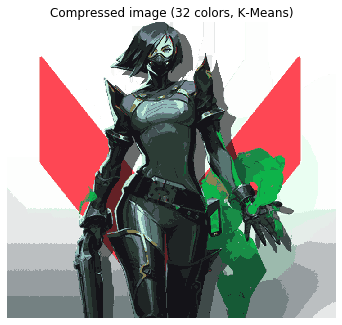

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(133)
plt.axis('off')
plt.title('Compressed image (32 colors, K-Means)')
plt.imshow(recreate_image(kmeans32.cluster_centers_, labels32, w, h))
plt.show()


In [10]:
print('Within cluster sum of square error for'+str( {n_colours[0]})+' clusters = '+str({round(kmeans64.inertia_,2)}))
print('Within cluster sum of square error for'+str( {n_colours[1]})+' clusters = '+str({round(kmeans32.inertia_,2)}))

Within cluster sum of square error for{64} clusters = {1225.46}
Within cluster sum of square error for{32} clusters = {2251.38}


(658, 731, 4)


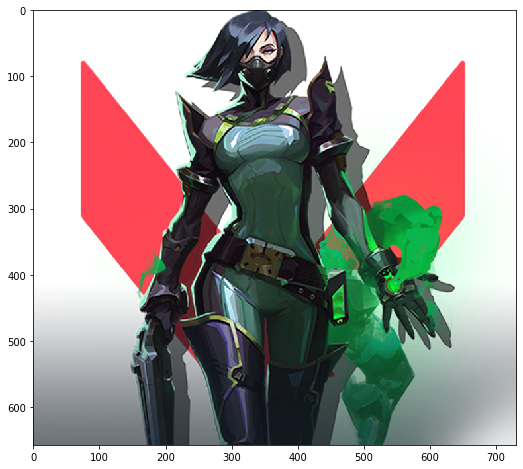

In [7]:
image_raw = io.imread(url)
print(image_raw.shape)
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

(658, 731)
1.0


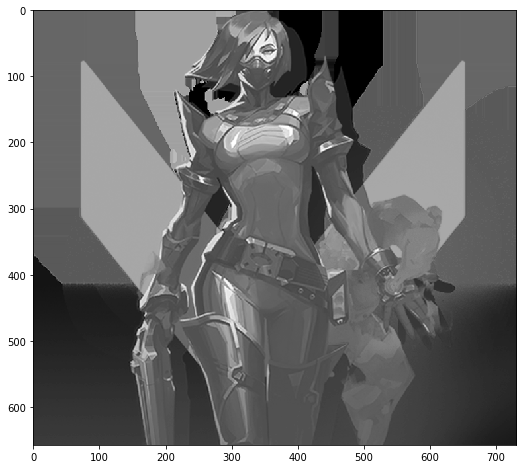

In [13]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw,cmap=plt.cm.gray)

Number of components explaining 95% variance: 33


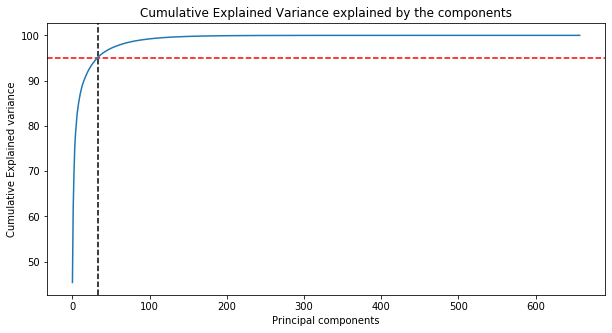

In [9]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

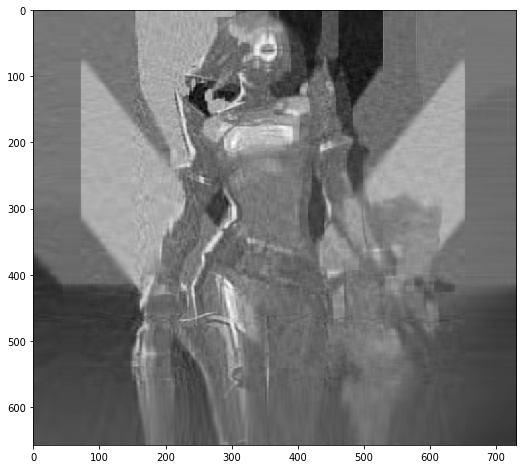

In [14]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap=plt.cm.gray)

In [15]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap=plt.cm.gray)

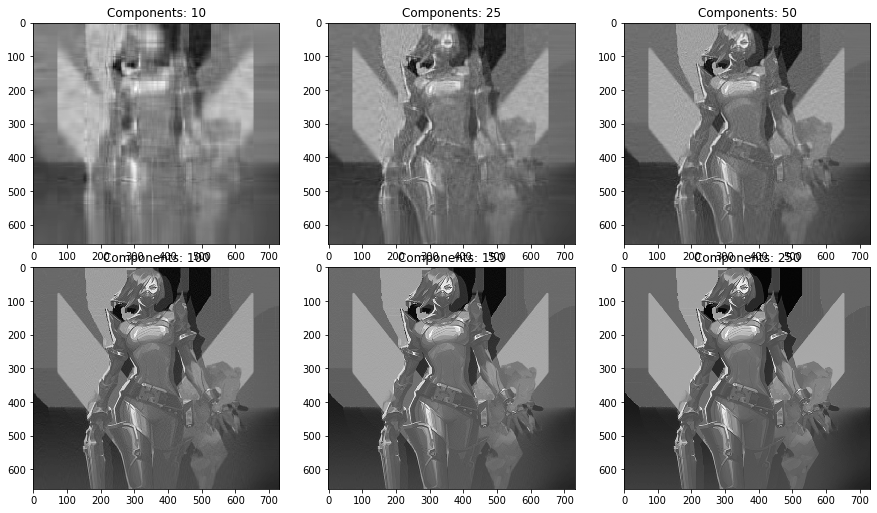

In [16]:
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1923992 and the array at index 1 has size 480998